In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

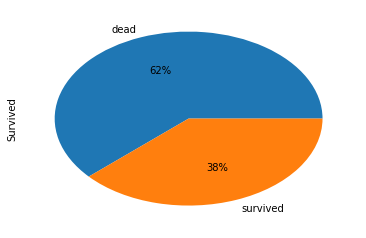

In [12]:
# 存活比例
train_data['Survived'].value_counts().plot.pie(autopct='%1.f%%',labels=['dead','survived'])

In [13]:
# 1)性别和生存的关系
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

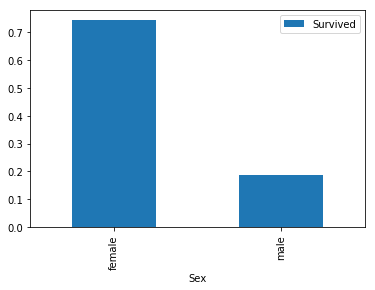

In [18]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

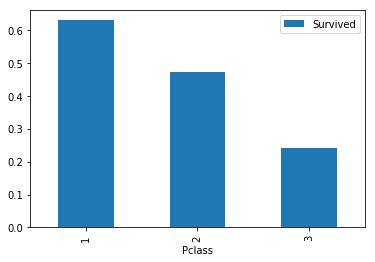

In [26]:
# 2）船舱等级和生存的关系
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

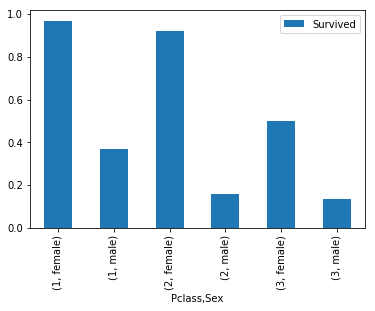

In [33]:
# 不同等级船舱，不同性别的生存率
train_data[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [ ]:
# 结论1：①妇女优先；
# ②一等舱男性相比其他舱男性生存率更高；

D:\soft\Anaconda\envs\py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


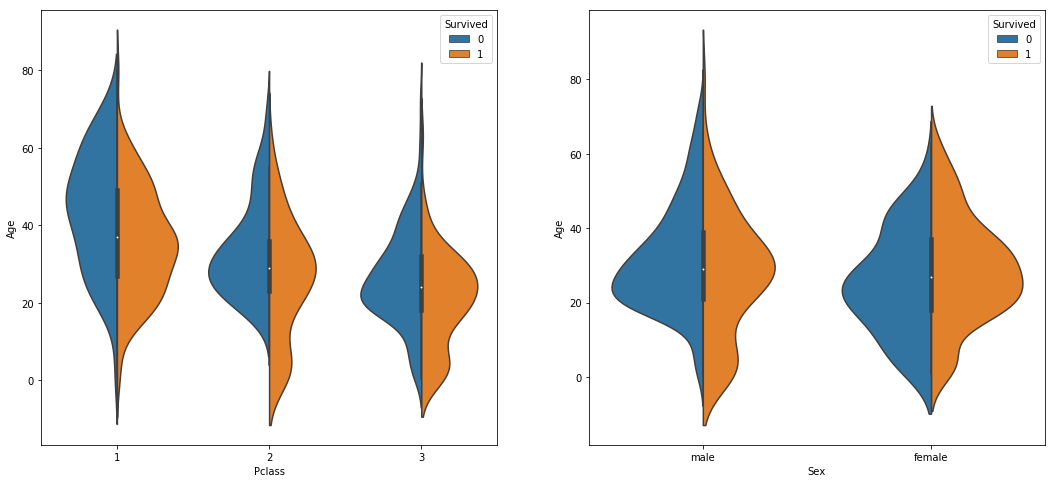

In [36]:
# 不同年龄的生存率
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train_data,split=True,ax=ax[0])

sns.violinplot('Sex','Age',hue='Survived',data=train_data,split=True,ax=ax[1])
plt.show()

In [45]:
train_data_org = pd.read_csv('data/train.csv')
test_data_org = pd.read_csv('data/test.csv')
test_data_org['Survived'] = 0
combined_train_test = train_data_org.append(test_data_org,sort=True)

In [46]:
if combined_train_test['Embarked'].isnull().sum() != 0:
    combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True)